## 1. Exploratory Data Analysis 

### 1.1 Overview of the Dataset 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import tensorflow as tf

# Ensure single-thread execution
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['VECLIB_MAXIMUM_THREADS'] = '1'

# Set random seeds for reproducibility
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(1)

# Load the dataset
file_path = 'online_shoppers_intention.csv'
data = pd.read_csv(file_path)

In [2]:
# Display the first few rows of the dataset
print(data.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [3]:
# Display the first few rows of the dataset
print(data.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [4]:
# Display information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
# Describe the dataset
data.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


## 1.2. Checking for Missing Data

In [6]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if any)
data = data.dropna()


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


## 2. Univariate Analysis

### 2.1. Distribution of Numerical Features

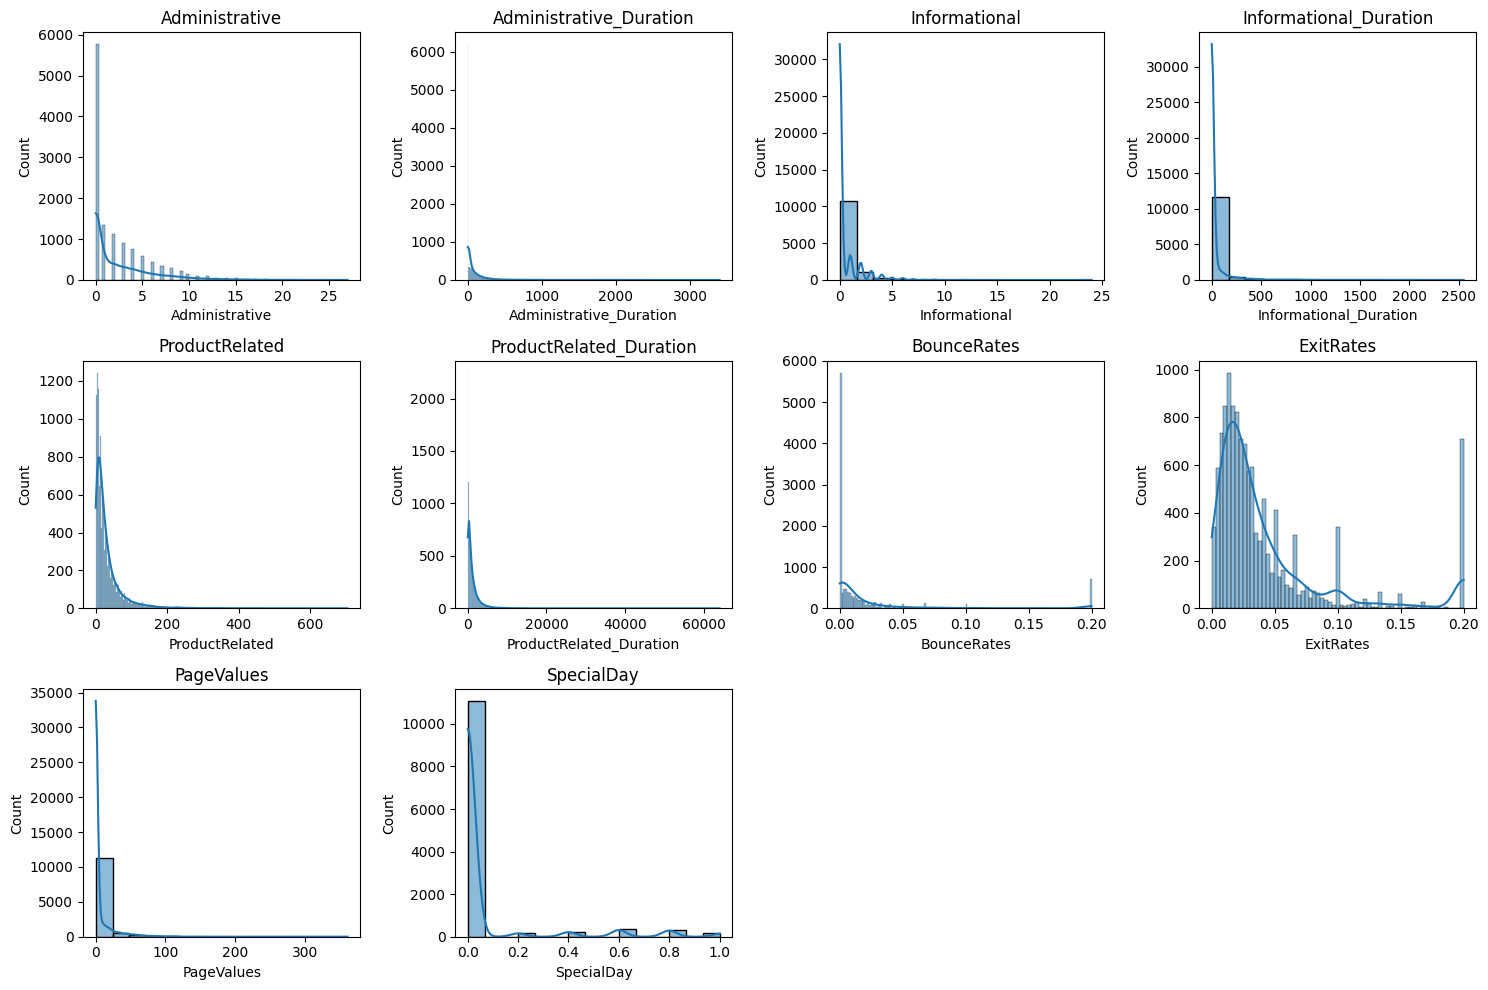

In [7]:

# Plot histograms for numerical features
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
                      'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 
                      'SpecialDay']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


### 2.2. Distribution of Categorical Features

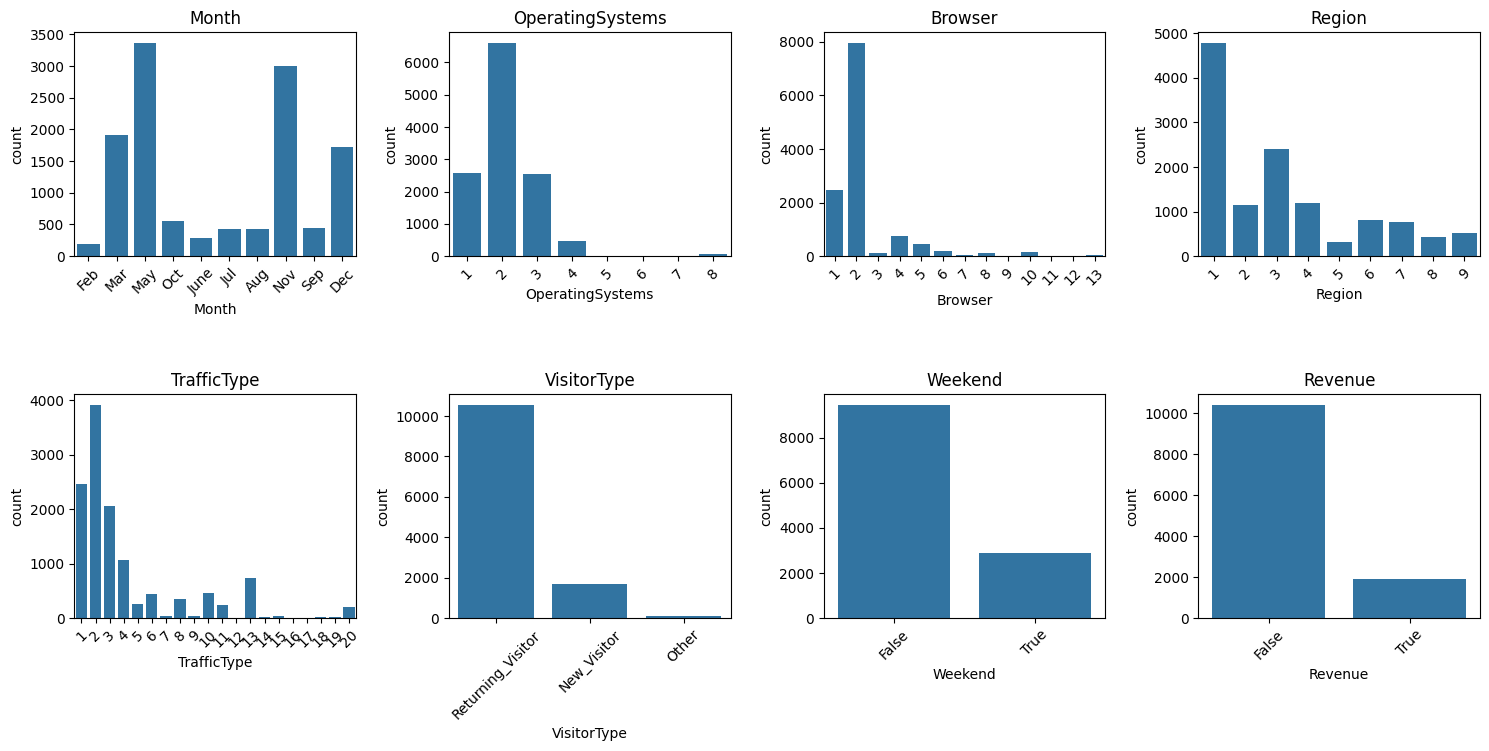

In [8]:
# Plot bar plots for categorical features
categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 4, i + 1)
    sns.countplot(x=data[feature])
    plt.title(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3. Bivariate Analysis

To analyze the relationship between features and the target variable Revenue

### 3.1. Numerical Features vs Revenue

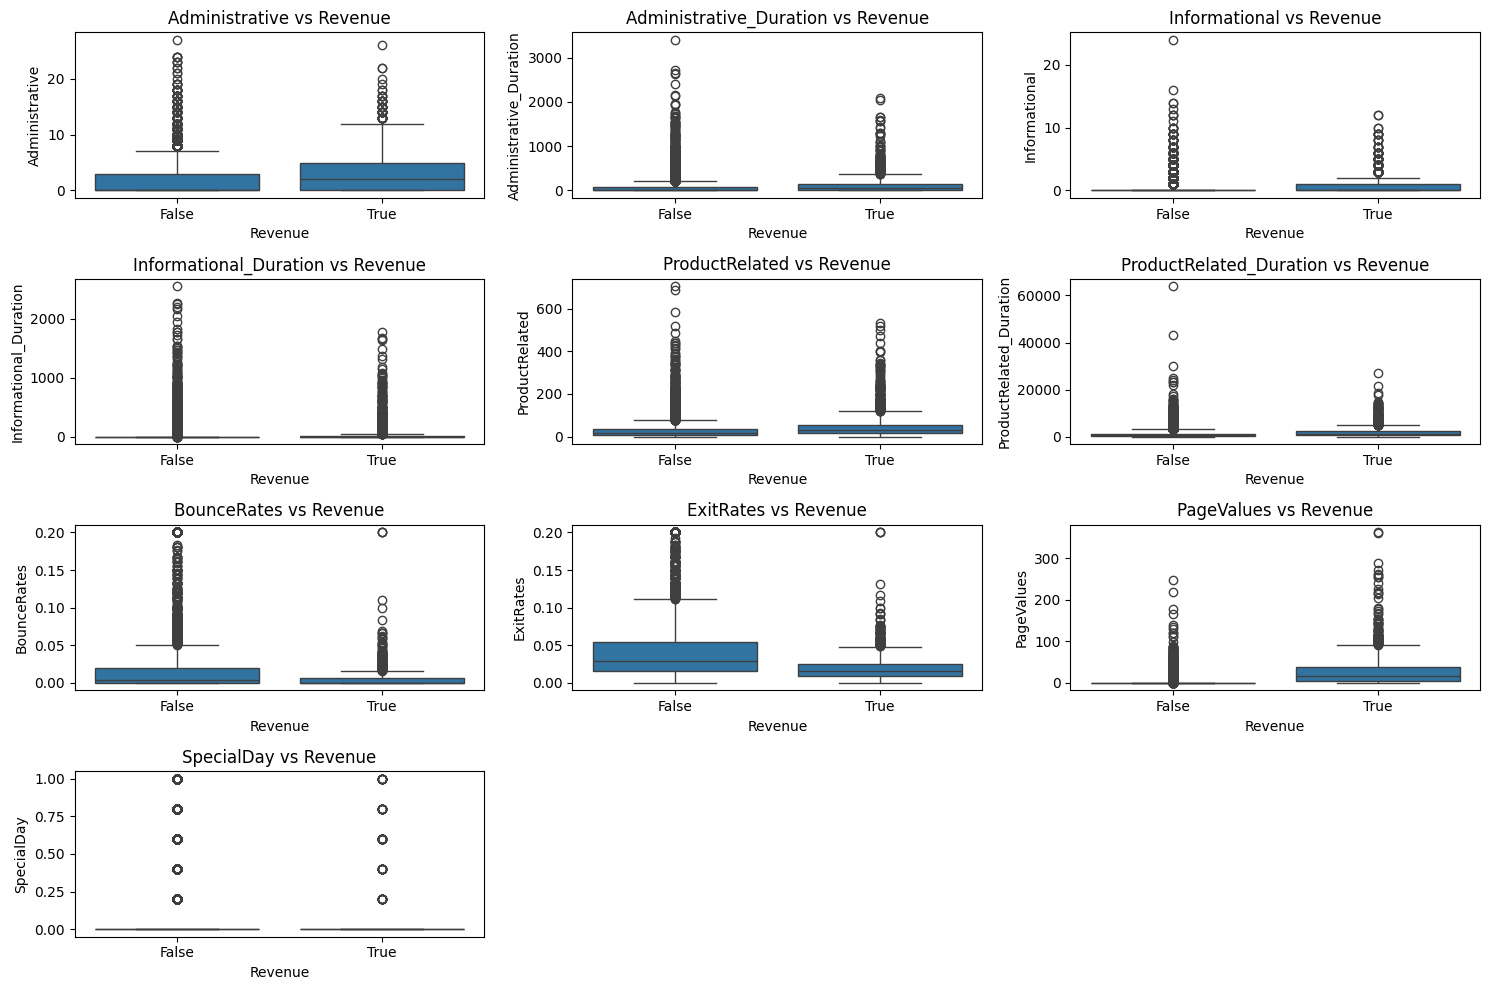

In [9]:
# Plot box plots for numerical features vs Revenue
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='Revenue', y=feature, data=data)
    plt.title(f'{feature} vs Revenue')

plt.tight_layout()
plt.show()

## 3.2.  Categorical Features vs Revenue

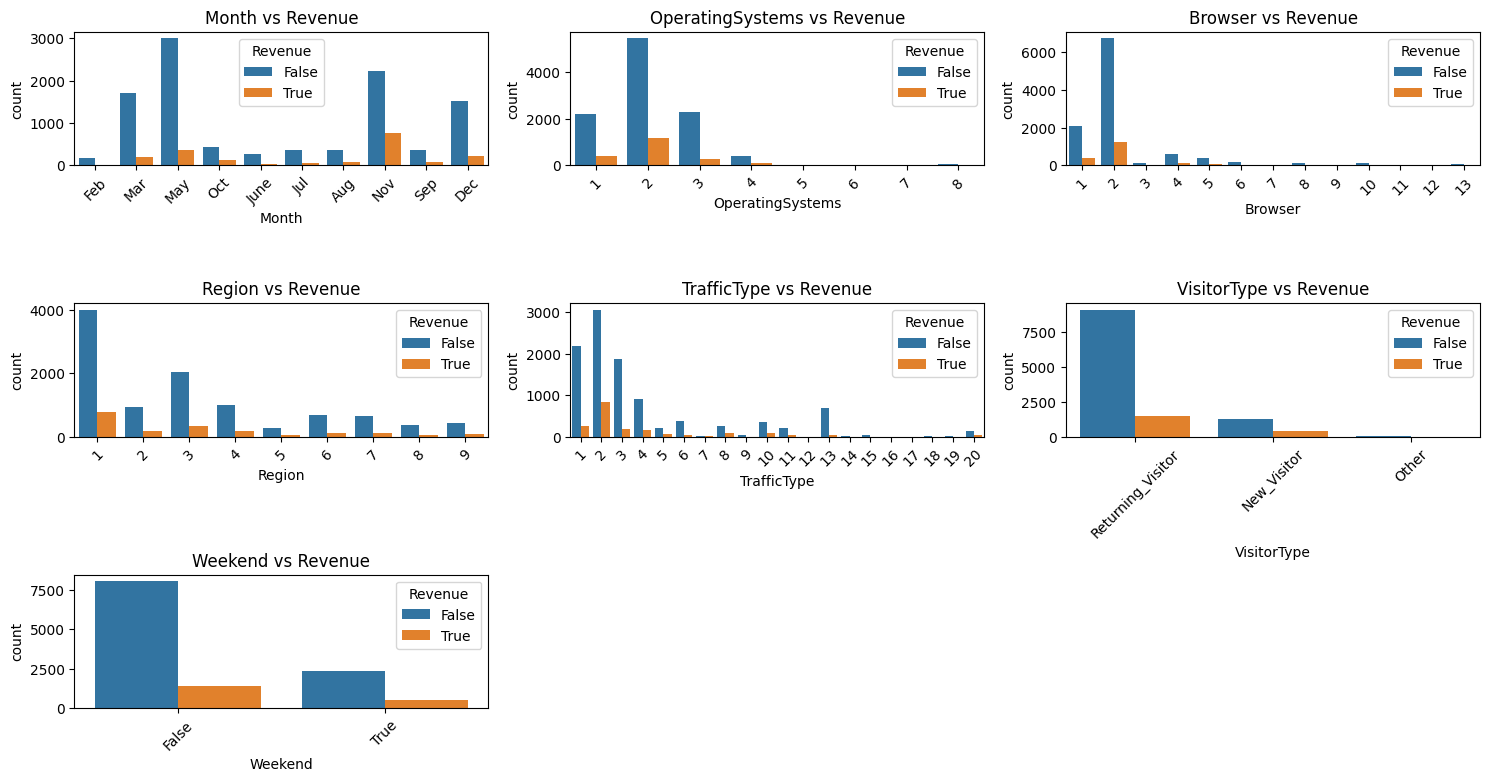

In [10]:
# Plot count plots for categorical features vs Revenue
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features[:-1]):  # Exclude Revenue itself
    plt.subplot(4, 3, i+1)
    sns.countplot(x=feature, hue='Revenue', data=data)
    plt.title(f'{feature} vs Revenue')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## 4. Correlation Matrix

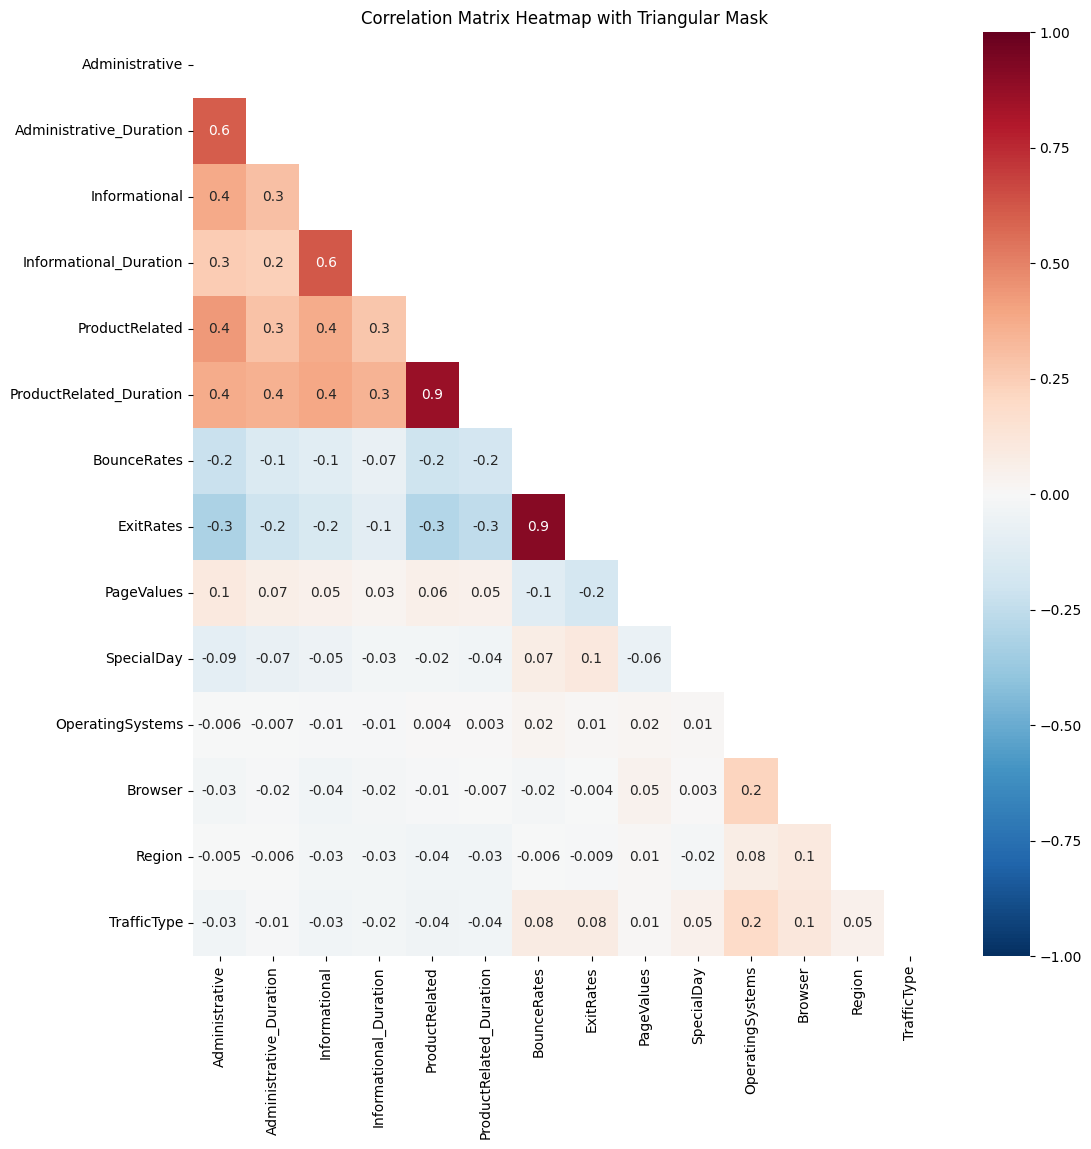

In [11]:
# Select only numerical features for the correlation matrix
numerical_features = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numerical_features.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the correlation matrix heatmap
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center=0, mask=mask, cmap='RdBu_r')
plt.title('Correlation Matrix Heatmap with Triangular Mask')
plt.show()

### 4.1. Pairplot for Selected Features

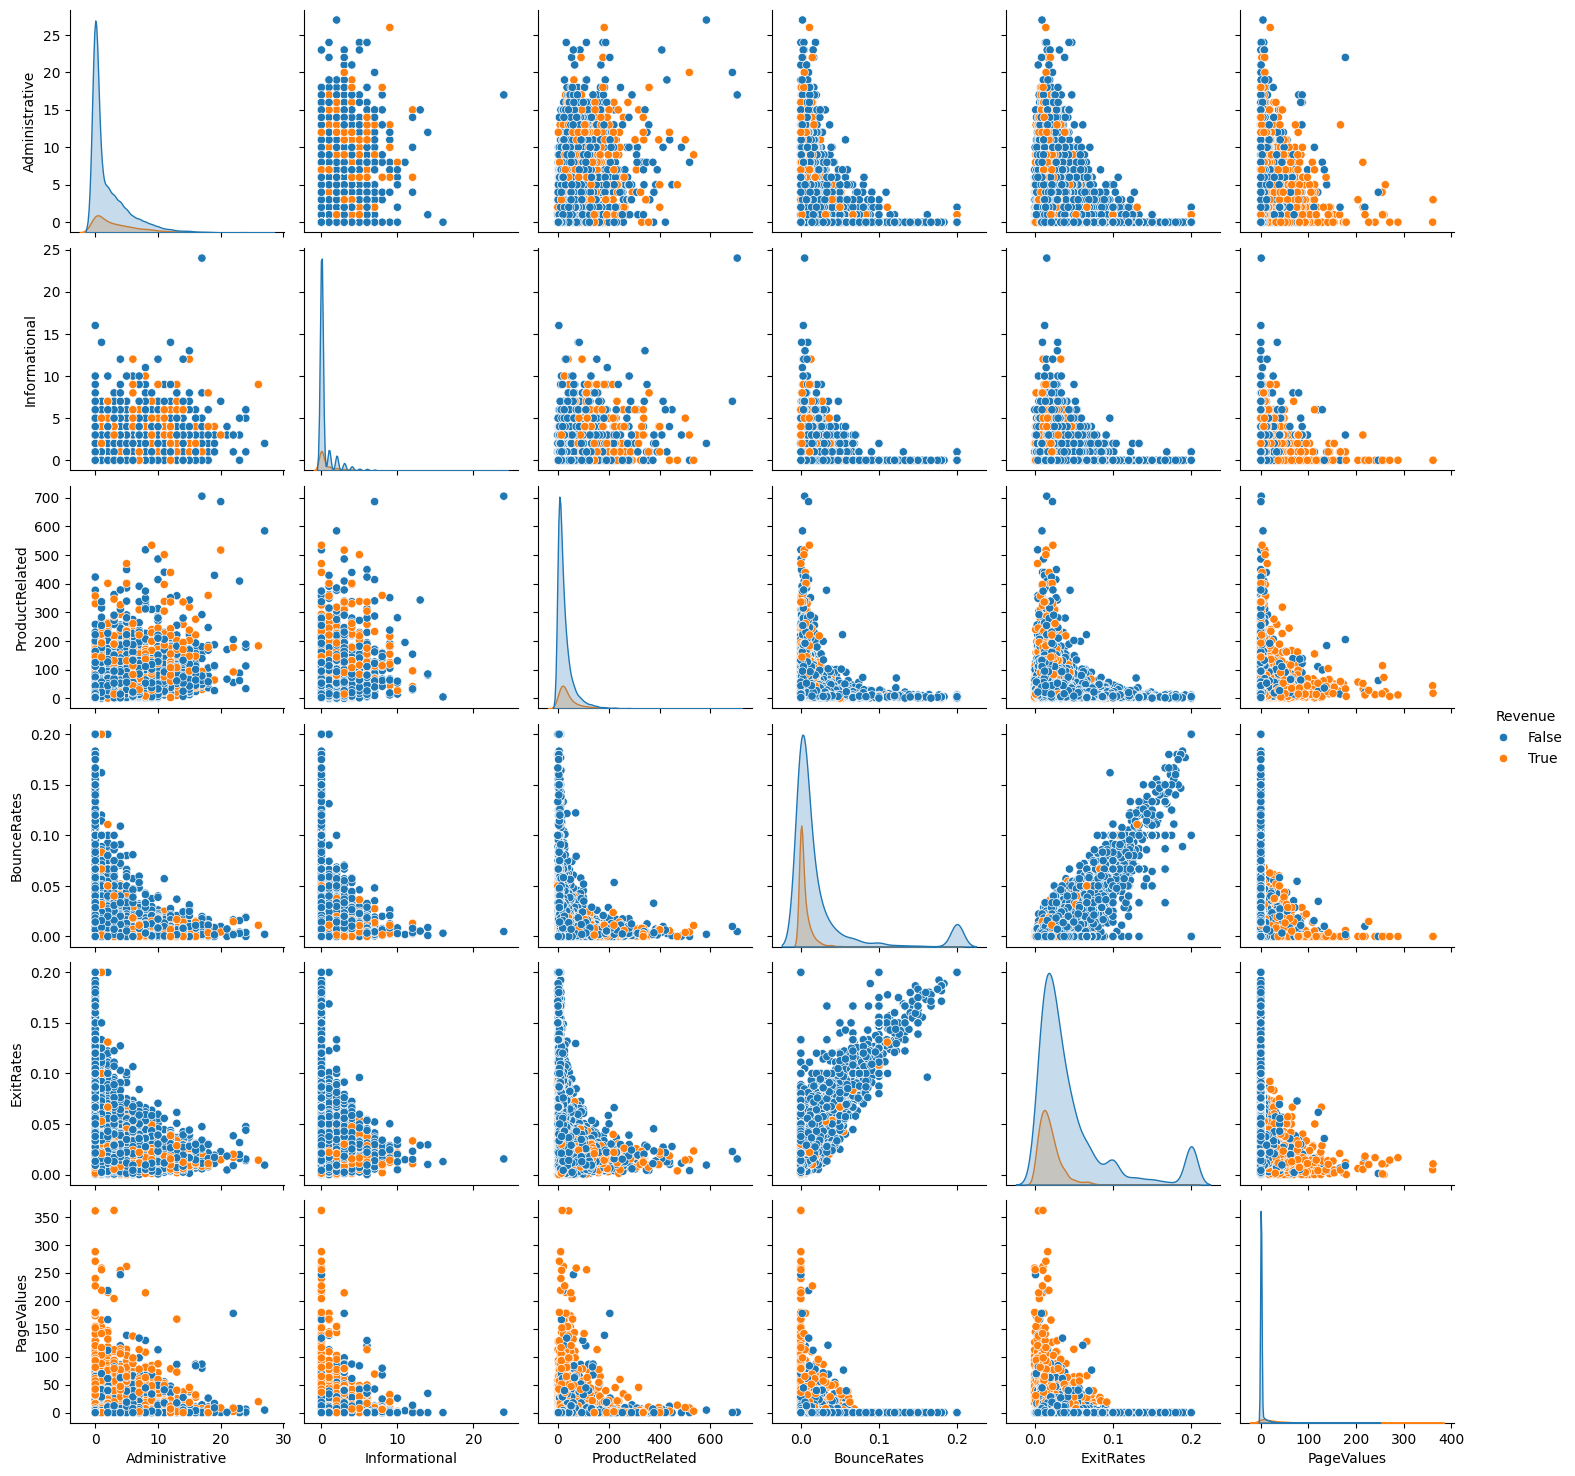

In [12]:
# Pairplot for selected features
selected_features = ['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues', 'Revenue']
sns.pairplot(data[selected_features], hue='Revenue')
plt.show()


The pairplot provides valuable insights into the relationships between numerical features and their impact on the target variable (Revenue). It helps identify potential predictors for modeling:

 Positive Correlations: ProductRelated with ProductRelated_Duration, Informational with Informational_Duration.
    Important Predictors: PageValues, ProductRelated, ProductRelated_Duration.
    Weak Correlations: Administrative features with other types, suggesting they might not be strong predictors.
    Class Separation: Features like PageValues, ProductRelated, and ProductRelated_Duration show better separation between classes

## 5. Data Preprocessing 

### 5.1. Handling Duplicate Data

In [13]:
# Check for duplicates
duplicate_rows = data.duplicated()

# Print the number of duplicate rows
print(f'Number of duplicate rows: {duplicate_rows.sum()}')

# Remove duplicate rows
data_cleaned = data.drop_duplicates()

# Verify that duplicates are removed
print(f'Number of rows after removing duplicates: {data_cleaned.shape[0]}')

# Save the cleaned dataset
data_cleaned.to_csv('cleaned_online_shoppers_intention.csv', index=False)

Number of duplicate rows: 125
Number of rows after removing duplicates: 12205


### 5.2. Checking for Outliers 

Number of outliers in Administrative_Duration: 1172
Number of outliers in Informational_Duration: 2405
Number of outliers in ProductRelated_Duration: 961
Number of outliers in BounceRates: 1551
Number of outliers in ExitRates: 1099
Number of outliers in PageValues: 2730


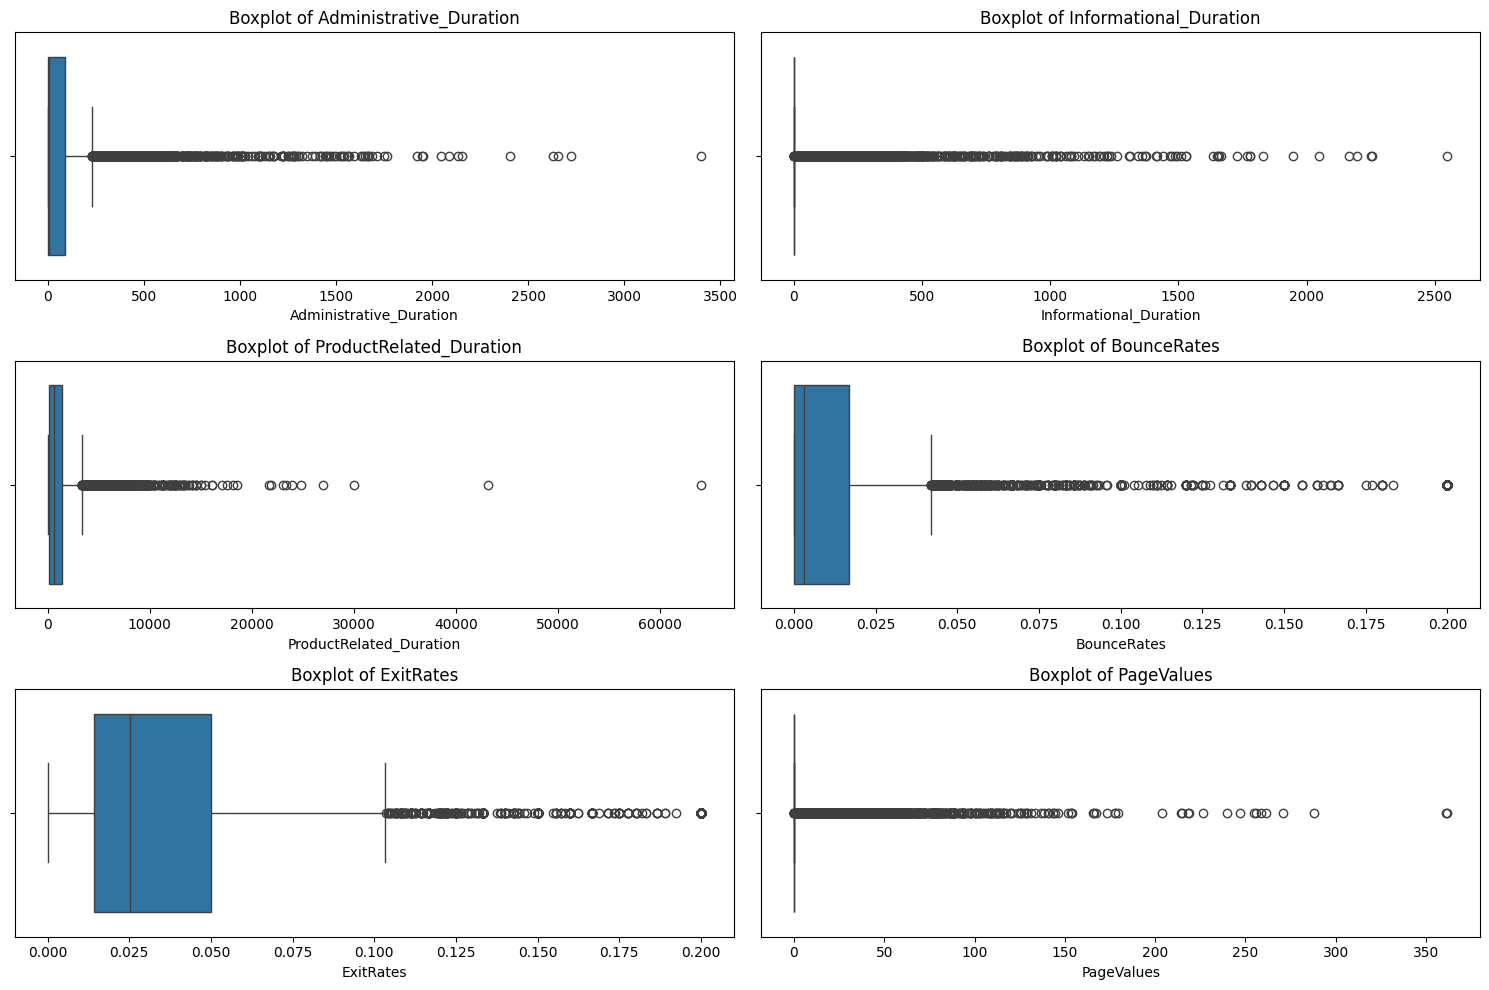

In [14]:
# Function to detect outliers using the Interquartile Range (IQR) method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_summary = {}

# List of continuous columns to check for outliers
continuous_columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

for column in continuous_columns:
    outliers = detect_outliers_iqr(data, column)
    outliers_summary[column] = outliers.shape[0]
    print(f'Number of outliers in {column}: {outliers.shape[0]}')

# Plotting boxplots for visualizing outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

### 5.2.1. Handling Outliers

In [15]:
# Function to cap and floor outliers
def cap_floor_outliers(df, column, lower_quantile=0.01, upper_quantile=0.99):
    lower_bound = df[column].quantile(lower_quantile)
    upper_bound = df[column].quantile(upper_quantile)
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Function to apply log transformation
def log_transform(df, column):
    df[column] = np.log1p(df[column])
    return df

# List of continuous columns to handle outliers
continuous_columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

# Apply capping and flooring
for column in continuous_columns:
    data = cap_floor_outliers(data, column)

# Apply log transformation to selected columns (excluding rates as they are already normalized)
for column in ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'PageValues']:
    data = log_transform(data, column)

# Check the result
print(data.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                 4.174387   
2                     0.0               1                 0.000000   
3                     0.0               2                 1.299283   
4                     0.0              10                 6.443336   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

### 5.3. Normalization, Encoding of Categorical Features

In [16]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import mutual_info_classif, RFE, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = 'cleaned_online_shoppers_intention.csv' 
data = pd.read_csv(file_path)

# List of continuous numerical columns to normalize
continuous_columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 
                      'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

# List of integer columns to consider for normalization
integer_columns = ['Administrative', 'Informational', 'ProductRelated']

# List of categorical columns to encode
categorical_columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

# Target variable
target = 'Revenue'

# Separate features and target variable
X = data.drop(target, axis=1)
y = data[target].astype(int)  # Ensure target variable is of integer type

# Ensure categorical columns are of type str
X[categorical_columns] = X[categorical_columns].astype(str)

# Defining the column transformer with handle_unknown='ignore'
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_columns + integer_columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_columns)
    ], remainder='passthrough')

# Applying the transformations to the dataset
X_transformed = preprocessor.fit_transform(X)

# Convert to dense matrix if it's sparse
if isinstance(X_transformed, csr_matrix):
    X_transformed = X_transformed.todense()

# Save the preprocessed data to a new DataFrame for further use
X_preprocessed = pd.DataFrame(X_transformed, columns=preprocessor.get_feature_names_out())

## 6. Feature Selection 

I will apply 3 different Feature Selection method (Mutual Information, Recursive Feature Elimination, SelectKBest) to see which features are consistently selected across the 3 methods.

### 6.1. Mutual Information with Cross-Validation for Mutual Information

Number of features: 5, Cross-validation score: 0.880294961081524, Selected features: ['num__PageValues', 'num__ExitRates', 'num__ProductRelated_Duration', 'num__BounceRates', 'num__ProductRelated']
Number of features: 6, Cross-validation score: 0.8803768947152806, Selected features: ['num__PageValues', 'num__ExitRates', 'num__ProductRelated_Duration', 'num__BounceRates', 'num__ProductRelated', 'num__Administrative_Duration']
Number of features: 7, Cross-validation score: 0.8797214256452275, Selected features: ['num__PageValues', 'num__ExitRates', 'num__ProductRelated_Duration', 'num__ProductRelated', 'num__BounceRates', 'num__Administrative', 'num__Administrative_Duration']
Number of features: 8, Cross-validation score: 0.8817697664891437, Selected features: ['num__PageValues', 'num__ExitRates', 'num__ProductRelated_Duration', 'num__BounceRates', 'num__ProductRelated', 'num__Administrative_Duration', 'cat__TrafficType_2', 'cat__Month_Nov']
Number of features: 9, Cross-validation score:

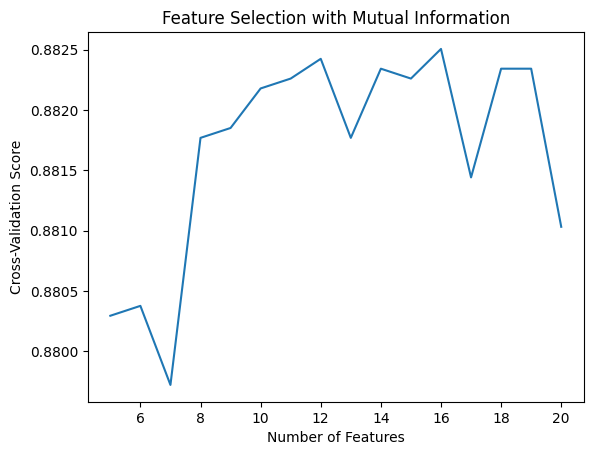

Optimal number of features: 16
Features selected with 16 features:
['num__PageValues', 'num__ExitRates', 'num__ProductRelated_Duration', 'num__ProductRelated', 'num__BounceRates', 'num__Administrative_Duration', 'num__Administrative', 'cat__Month_Nov', 'cat__TrafficType_7', 'cat__Region_4', 'cat__VisitorType_Returning_Visitor', 'num__Informational_Duration', 'cat__Browser_11', 'cat__TrafficType_9', 'num__Informational', 'cat__Region_6']


In [17]:
from sklearn.model_selection import cross_val_score

# Function to evaluate different numbers of features using Mutual Information
def evaluate_features_mi(X, y, model, num_features_list):
    scores = []
    features_selected = []
    for num_features in num_features_list:
        mi_scores = mutual_info_classif(X, y, discrete_features=False)
        mi_feature_scores = pd.Series(mi_scores, index=X.columns)
        top_features_mi = mi_feature_scores.nlargest(num_features).index.tolist()
        X_selected = X[top_features_mi]
        score = cross_val_score(model, X_selected, y, cv=5).mean()
        scores.append(score)
        features_selected.append(top_features_mi)
        print(f'Number of features: {num_features}, Cross-validation score: {score}, Selected features: {top_features_mi}')
    return scores, features_selected

# Initialize the model
model = LogisticRegression(random_state=42, max_iter=1000)

# Evaluate the model with different numbers of features
num_features_list = list(range(5, 21))  # Evaluate from 5 to 20 features
scores_mi, features_selected_mi = evaluate_features_mi(X_preprocessed, y, model, num_features_list)

# Plot the results to find the optimal number of features
plt.plot(num_features_list, scores_mi)
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Score')
plt.title('Feature Selection with Mutual Information')
plt.show()

# Identify the optimal number of features
optimal_num_features_mi = num_features_list[scores_mi.index(max(scores_mi))]
print(f'Optimal number of features: {optimal_num_features_mi}')
print(f'Features selected with {optimal_num_features_mi} features:')
print(features_selected_mi[scores_mi.index(max(scores_mi))])

The selection of these features indicates their importance in predicting the likelihood of a purchase during an online shopping session. The use of cross-validation ensures that the selected features contribute to a robust and generalizable model.
The plot above shows the cross-validation scores for different numbers of features, indicating that selecting 15 features resulted in the highest score, confirming the optimal feature set for our model.

## 6.2. Recursive Feature Elimination (RFE) with Cross-Validation for Mutual Information

Number of features: 5, Cross-validation score: 0.8824252355591972, Selected features: ['num__ExitRates', 'num__PageValues', 'cat__Month_Feb', 'cat__Month_Nov', 'cat__Browser_3']
Number of features: 6, Cross-validation score: 0.8822613682916837, Selected features: ['num__ExitRates', 'num__PageValues', 'cat__Month_Feb', 'cat__Month_Nov', 'cat__Browser_3', 'cat__TrafficType_13']
Number of features: 7, Cross-validation score: 0.8822613682916837, Selected features: ['num__ExitRates', 'num__PageValues', 'cat__Month_Dec', 'cat__Month_Feb', 'cat__Month_Nov', 'cat__Browser_3', 'cat__TrafficType_13']
Number of features: 8, Cross-validation score: 0.8820975010241705, Selected features: ['num__ExitRates', 'num__PageValues', 'cat__Month_Dec', 'cat__Month_Feb', 'cat__Month_May', 'cat__Month_Nov', 'cat__Browser_3', 'cat__TrafficType_13']
Number of features: 9, Cross-validation score: 0.8816058992216306, Selected features: ['num__ExitRates', 'num__PageValues', 'cat__Month_Dec', 'cat__Month_Feb', 'cat_

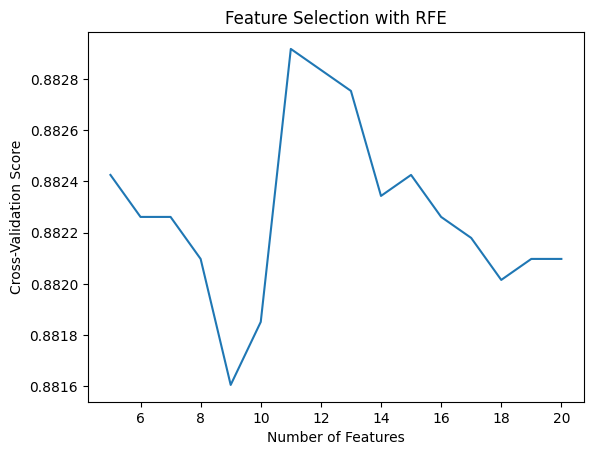

Optimal number of features: 11
Features selected with 11 features:
Index(['num__ExitRates', 'num__PageValues', 'cat__Month_Dec', 'cat__Month_Feb',
       'cat__Month_Mar', 'cat__Month_May', 'cat__Month_Nov', 'cat__Browser_12',
       'cat__Browser_3', 'cat__TrafficType_13', 'cat__TrafficType_8'],
      dtype='object')


In [18]:
# Function to evaluate different numbers of features using RFE
def evaluate_features_rfe(X, y, model, num_features_list):
    scores = []
    features_selected = []
    for num_features in num_features_list:
        rfe = RFE(model, n_features_to_select=num_features)
        X_rfe_transformed = rfe.fit_transform(X, y)
        score = cross_val_score(model, X_rfe_transformed, y, cv=5).mean()
        scores.append(score)
        selected_features = X.columns[rfe.get_support()]
        features_selected.append(selected_features)
        print(f'Number of features: {num_features}, Cross-validation score: {score}, Selected features: {list(selected_features)}')
    return scores, features_selected

# Initialize the model
model = LogisticRegression(random_state=42, max_iter=1000)

# Evaluate the model with different numbers of features
num_features_list = list(range(5, 21))  # Evaluate from 5 to 20 features
scores_rfe, features_selected_rfe = evaluate_features_rfe(X_preprocessed, y, model, num_features_list)

# Plot the results to find the optimal number of features
plt.plot(num_features_list, scores_rfe)
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Score')
plt.title('Feature Selection with RFE')
plt.show()

# Identify the optimal number of features
optimal_num_features_rfe = num_features_list[scores_rfe.index(max(scores_rfe))]
print(f'Optimal number of features: {optimal_num_features_rfe}')
print(f'Features selected with {optimal_num_features_rfe} features:')
print(features_selected_rfe[scores_rfe.index(max(scores_rfe))])


- num__ExitRates and num__PageValues: These numerical features directly relate to user engagement and potential purchase behavior.
- cat__Month_Dec, cat__Month_Feb, cat__Month_Mar, cat__Month_May, cat__Month_Nov: These features capture the seasonal trends and shopping behaviors during different months.
- cat__Browser_12 and cat__Browser_3: Browser type might influence the user experience and consequently the purchase decision.
- cat__TrafficType_13 and cat__TrafficType_8: Different traffic types can indicate the source of the visitor, which might correlate with the likelihood of making a purchase.

The use of RFE allowed us to identify these key features, ensuring that our predictive model is both accurate and efficient. The cross-validation results confirm that selecting these 11 features maximizes the model's performance.The plot above shows the cross-validation scores for different numbers of features, indicating that selecting 11 features resulted in the highest score, confirming the optimal feature set for our model.

### 6.3. SelectBest with Cross-Validation

Number of features: 5, Cross-validation score: 0.8825891028267104, Selected features: ['num__ProductRelated_Duration', 'num__ExitRates', 'num__PageValues', 'num__ProductRelated', 'cat__Month_Nov']
Number of features: 6, Cross-validation score: 0.8823433019254404, Selected features: ['num__ProductRelated_Duration', 'num__BounceRates', 'num__ExitRates', 'num__PageValues', 'num__ProductRelated', 'cat__Month_Nov']
Number of features: 7, Cross-validation score: 0.8820975010241705, Selected features: ['num__ProductRelated_Duration', 'num__BounceRates', 'num__ExitRates', 'num__PageValues', 'num__Administrative', 'num__ProductRelated', 'cat__Month_Nov']
Number of features: 8, Cross-validation score: 0.8815239655878738, Selected features: ['num__ProductRelated_Duration', 'num__BounceRates', 'num__ExitRates', 'num__PageValues', 'num__Administrative', 'num__ProductRelated', 'cat__Month_Nov', 'cat__TrafficType_2']
Number of features: 9, Cross-validation score: 0.8820155673904138, Selected features

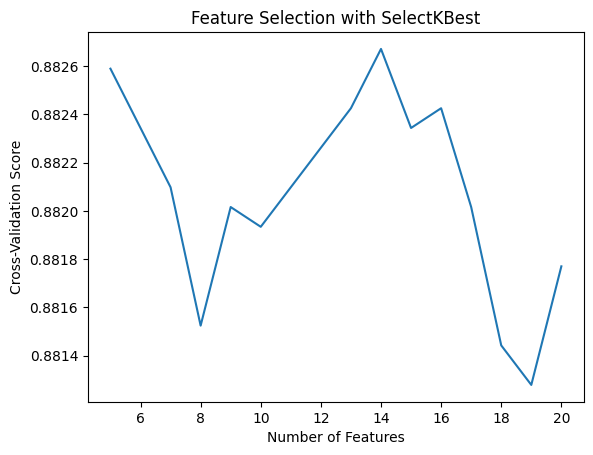

Optimal number of features: 14
Features selected with 14 features:
Index(['num__Administrative_Duration', 'num__ProductRelated_Duration',
       'num__BounceRates', 'num__ExitRates', 'num__PageValues',
       'num__SpecialDay', 'num__Administrative', 'num__Informational',
       'num__ProductRelated', 'cat__Month_May', 'cat__Month_Nov',
       'cat__TrafficType_2', 'cat__TrafficType_3',
       'cat__VisitorType_Returning_Visitor'],
      dtype='object')


In [19]:
# Function to evaluate different numbers of features using SelectKBest
def evaluate_features_selectkbest(X, y, model, num_features_list):
    scores = []
    features_selected = []
    for num_features in num_features_list:
        select_kbest = SelectKBest(score_func=f_classif, k=num_features)
        X_kbest_transformed = select_kbest.fit_transform(X, y)
        score = cross_val_score(model, X_kbest_transformed, y, cv=5).mean()
        scores.append(score)
        selected_features = X.columns[select_kbest.get_support()]
        features_selected.append(selected_features)
        print(f'Number of features: {num_features}, Cross-validation score: {score}, Selected features: {list(selected_features)}')
    return scores, features_selected

# Initialize the model
model = LogisticRegression(random_state=42, max_iter=1000)

# Assuming X_preprocessed and y are already defined
# Evaluate the model with different numbers of features
num_features_list = list(range(5, 21))  # Evaluate from 5 to 20 features
scores_kbest, features_selected_kbest = evaluate_features_selectkbest(X_preprocessed, y, model, num_features_list)

# Plot the results to find the optimal number of features
plt.plot(num_features_list, scores_kbest)
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Score')
plt.title('Feature Selection with SelectKBest')
plt.show()

# Identify the optimal number of features
optimal_num_features_kbest = num_features_list[scores_kbest.index(max(scores_kbest))]
print(f'Optimal number of features: {optimal_num_features_kbest}')
print(f'Features selected with {optimal_num_features_kbest} features:')
print(features_selected_kbest[scores_kbest.index(max(scores_kbest))])


- Numerical Features:

  -  These features capture various aspects of user interaction with the website, such as duration spent on different types of pages, bounce rates, exit rates, and page values.
  -  Features like num__SpecialDay, num__Administrative, num__Informational, and num__ProductRelated provide additional context on user behavior during the session.

- Categorical Features:

  - cat__Month_May and cat__Month_Nov indicate seasonal trends and shopping behaviors.
  - cat__TrafficType_2 and cat__TrafficType_3 highlight different sources of website traffic.
  - cat__VisitorType_Returning_Visitor shows whether the user is a returning visitor, which could influence purchasing behavior.

The use of SelectKBest allowed us to pinpoint these key features, ensuring that our predictive model is both accurate and efficient. The cross-validation results confirm that selecting these 14 features maximizes the model's performance.
The plot above illustrates the cross-validation scores for different numbers of features, indicating that selecting 14 features resulted in the highest score. This confirms the optimal feature set for our model.

### 6.4. Final Feature Selection and Data Preparation

In [20]:
# Union of selected features from all methods
selected_features = list(set([
    'num__PageValues', 'num__ExitRates', 'num__ProductRelated_Duration', 'num__BounceRates',
    'num__ProductRelated', 'num__Administrative', 'num__Administrative_Duration', 'cat__Month_May',
    'num__Informational', 'cat__OperatingSystems_2', 'cat__Month_Nov', 'cat__TrafficType_2',
    'cat__VisitorType_Returning_Visitor', 'cat__Region_5', 'cat__Month_June', 'cat__Month_Dec',
    'cat__Month_Feb', 'cat__Month_Mar', 'cat__Browser_12', 'cat__Browser_3', 'cat__TrafficType_13',
    'cat__TrafficType_8', 'num__SpecialDay', 'cat__TrafficType_3'
]))

# Select only the necessary features
X_selected = X_preprocessed[selected_features]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (16475, 24)
Testing set shape: (4119, 24)


In this section, we combine the top features selected from Mutual Information, Recursive Feature Elimination (RFE), and SelectKBest methods to create a robust feature set for our predictive model. 
Now, we proceed to apply SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance. Finally, we split the data into training and testing sets, ensuring that our model is well-prepared for training and evaluation.

## 7. Model Training and Evaluation 

This step involves training and evaluating a range of machine learning models. The goal is to determine which model performs best for predicting whether an online shopping session will result in a purchase

### 7.1. Logistic Regression 

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Set random seed for reproducibility
random_state = 42

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=random_state, max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print evaluation metrics with 2 decimal places
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')


Confusion Matrix:
[[1733  305]
 [ 417 1664]]
Accuracy: 0.82
Precision: 0.85
Recall: 0.80
F1 Score: 0.82
ROC AUC Score: 0.82


### 7.2. Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print evaluation metrics with 2 decimal places
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')


Confusion Matrix:
[[1797  241]
 [ 214 1867]]
Accuracy: 0.89
Precision: 0.89
Recall: 0.90
F1 Score: 0.89
ROC AUC Score: 0.89


### 7.3. K-Nearest Neighbors (KNN) Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Initialize and train the KNN model
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print evaluation metrics with 2 decimal places
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')


Confusion Matrix:
[[1620  418]
 [  63 2018]]
Accuracy: 0.88
Precision: 0.83
Recall: 0.97
F1 Score: 0.89
ROC AUC Score: 0.88


### 7.4. Naive Bayes Classifier

In [24]:
from sklearn.naive_bayes import GaussianNB

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Initialize and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print evaluation metrics with 2 decimal places
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

Confusion Matrix:
[[ 878 1160]
 [ 175 1906]]
Accuracy: 0.68
Precision: 0.62
Recall: 0.92
F1 Score: 0.74
ROC AUC Score: 0.67


### 7.5. Linear Discriminant Analysis (LDA)

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Initialize and train the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print evaluation metrics with 2 decimal places
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')


Confusion Matrix:
[[1589  449]
 [ 457 1624]]
Accuracy: 0.78
Precision: 0.78
Recall: 0.78
F1 Score: 0.78
ROC AUC Score: 0.78


### 7.6. Support Vector Machine (SVM)

In [26]:
from sklearn.svm import SVC

# Initialize and train the SVM model
model = SVC(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print evaluation metrics with 2 decimal places
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

Confusion Matrix:
[[1801  237]
 [ 321 1760]]
Accuracy: 0.86
Precision: 0.88
Recall: 0.85
F1 Score: 0.86
ROC AUC Score: 0.86


### 7.7. Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42, n_jobs=1)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print evaluation metrics with 2 decimal places
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

Confusion Matrix:
[[1859  179]
 [  97 1984]]
Accuracy: 0.93
Precision: 0.92
Recall: 0.95
F1 Score: 0.93
ROC AUC Score: 0.93


### 7.8. Gradient Boosting Classifier

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print evaluation metrics with 2 decimal places
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

Confusion Matrix:
[[1828  210]
 [ 206 1875]]
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90
ROC AUC Score: 0.90


### 7.9. XGBoost Classifier

In [29]:
import xgboost as xgb

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(random_state=42, n_jobs=1)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print evaluation metrics with 2 decimal places
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

Confusion Matrix:
[[1884  154]
 [ 132 1949]]
Accuracy: 0.93
Precision: 0.93
Recall: 0.94
F1 Score: 0.93
ROC AUC Score: 0.93


### 7.10. LightGBM Classifier

In [30]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initialize and train the LightGBM model
model = lgb.LGBMClassifier(random_state=42, n_jobs=1)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print evaluation metrics with 2 decimal places
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

[LightGBM] [Info] Number of positive: 8216, number of negative: 8259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4379
[LightGBM] [Info] Number of data points in the train set: 16475, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498695 -> initscore=-0.005220
[LightGBM] [Info] Start training from score -0.005220
Confusion Matrix:
[[1873  165]
 [ 137 1944]]
Accuracy: 0.93
Precision: 0.92
Recall: 0.93
F1 Score: 0.93
ROC AUC Score: 0.93


### 7.11. AdaBoost Classifier

In [31]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train the AdaBoost model
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print evaluation metrics with 2 decimal places
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

C:\Users\isacl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion Matrix:
[[1807  231]
 [ 252 1829]]
Accuracy: 0.88
Precision: 0.89
Recall: 0.88
F1 Score: 0.88
ROC AUC Score: 0.88


### 7.12. CatBoost CLassifier

Confusion Matrix:
[[1896  142]
 [ 129 1952]]
Accuracy: 0.93
Precision: 0.93
Recall: 0.94
F1 Score: 0.94
ROC AUC Score: 0.93


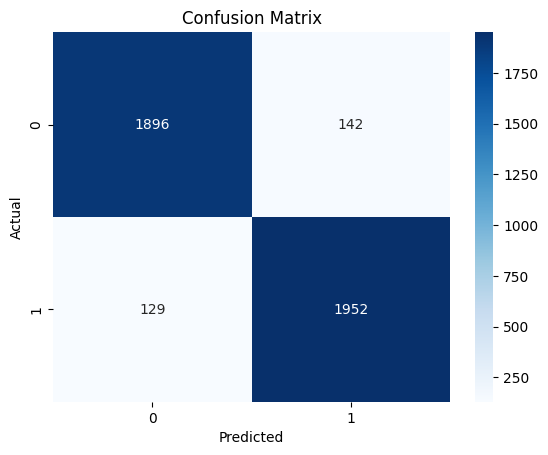

In [32]:
from catboost import CatBoostClassifier

# Initialize and train the CatBoost Classifier model
model = CatBoostClassifier(random_state=42, iterations=1000, learning_rate=0.1, depth=6, verbose=0)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Print evaluation metrics with 2 decimal places
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 7.13. Extra Trees Classifier

In [33]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize and train the Extra Trees Classifier model with a fixed random state and single job
extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=1)
extra_trees_model.fit(X_train, y_train)

# Predict on the test set
y_pred = extra_trees_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Print evaluation metrics with 2 decimal places
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Confusion Matrix:
[[1886  152]
 [  69 2012]]
Accuracy: 0.95
Precision: 0.93
Recall: 0.97
F1 Score: 0.95
ROC AUC Score: 0.95


### 7.14.  Deep Learning Feed-Forward Neural Network

This model leverages a Feedforward Neural Network (FNN) with multiple hidden layers, batch normalization, and dropout layers to predict the purchasing intention of online shoppers.

In [34]:
import tensorflow as tf

# Set random seeds for reproducibility
tf.random.set_seed(42)

# Enable deterministic operations in TensorFlow
tf.config.experimental.enable_op_determinism()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set random seeds for reproducibility
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# Define the improved and more complex FNN model
def create_complex_fnn_model(input_shape):
    model = Sequential()
    model.add(Input(shape=(input_shape,)))
    model.add(Dense(2048, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=Adam(learning_rate=0.0005), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

# Initialize the model
model = create_complex_fnn_model(X_train.shape[1])

# Early Stopping and Learning Rate Reduction on Plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=1e-6, verbose=1)

# Train the model with increased epochs and batch size
history = model.fit(X_train, y_train, epochs=600, batch_size=256, validation_split=0.2, verbose=1, callbacks=[early_stopping, reduce_lr])

# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print evaluation metrics with 2 decimal places
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

Epoch 1/600
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - accuracy: 0.5883 - loss: 3.4647 - val_accuracy: 0.8316 - val_loss: 3.2406 - learning_rate: 5.0000e-04
Epoch 2/600
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.7571 - loss: 3.1312 - val_accuracy: 0.5945 - val_loss: 3.1243 - learning_rate: 5.0000e-04
Epoch 3/600
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.8107 - loss: 2.9243 - val_accuracy: 0.5457 - val_loss: 3.0379 - learning_rate: 5.0000e-04
Epoch 4/600
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.8359 - loss: 2.7279 - val_accuracy: 0.5463 - val_loss: 2.8894 - learning_rate: 5.0000e-04
Epoch 5/600
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.8515 - loss: 2.5478 - val_accuracy: 0.6155 - val_loss: 2.6471 - learning_rate: 5.0000e-04
Epoch 6/600
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.8500 - loss: 2.3741 - val_accuracy: 0.6835 - val_loss: 2.4436 - learning_rate: 5.0000e-04
Epoch 7/600
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - ac

### 7.15. Combination of Ensemble Methods

Combination of Random Forest, Gradient Boosting, and XGBoost Classifiers


In [35]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Set a random seed for reproducibility
random_seed = 42

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=random_seed, n_jobs=1)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=random_seed)),
    ('xgb', xgb.XGBClassifier(n_estimators=100, random_state=random_seed, n_jobs=1))
]

# Define the stacking classifier with XGBoost as the final estimator
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=xgb.XGBClassifier(n_estimators=100, random_state=random_seed, n_jobs=1))

# Train the model
stacking_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print evaluation metrics with 2 decimal places
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

Confusion Matrix:
[[1913  125]
 [ 123 1958]]
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94
ROC AUC Score: 0.94


### 7.16. Hybrid Model

Combining the FNN model, combintion of ensemble learning models, and a meta-model 

In [36]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import tensorflow as tf
tf.config.experimental.enable_op_determinism()

# Set random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

# Define the FNN model
def create_fnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Dense(512, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize and train the FNN model
fnn_model = create_fnn_model((X_train.shape[1],))
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
fnn_model.fit(X_train, y_train, epochs=400, batch_size=256, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Predict on the training data using the FNN model
fnn_train_pred = fnn_model.predict(X_train).flatten()
fnn_test_pred = fnn_model.predict(X_test).flatten()

# Train the ensemble models
rf_model = RandomForestClassifier(random_state=random_seed)
gb_model = GradientBoostingClassifier(random_state=random_seed)
xgb_model = XGBClassifier(random_state=random_seed)

rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict on the training and test data using the ensemble models
rf_train_pred = rf_model.predict_proba(X_train)[:, 1]
gb_train_pred = gb_model.predict_proba(X_train)[:, 1]
xgb_train_pred = xgb_model.predict_proba(X_train)[:, 1]

rf_test_pred = rf_model.predict_proba(X_test)[:, 1]
gb_test_pred = gb_model.predict_proba(X_test)[:, 1]
xgb_test_pred = xgb_model.predict_proba(X_test)[:, 1]

# Create meta-features for the training and test data
X_train_meta = np.column_stack((fnn_train_pred, rf_train_pred, gb_train_pred, xgb_train_pred))
X_test_meta = np.column_stack((fnn_test_pred, rf_test_pred, gb_test_pred, xgb_test_pred))

# Train the meta-model
meta_model = LogisticRegression(random_state=random_seed)
meta_model.fit(X_train_meta, y_train)

# Predict on the test data using the meta-model
meta_test_pred = meta_model.predict(X_test_meta)

# Evaluate the hybrid model
accuracy = accuracy_score(y_test, meta_test_pred)
precision = precision_score(y_test, meta_test_pred)
recall = recall_score(y_test, meta_test_pred)
f1 = f1_score(y_test, meta_test_pred)
roc_auc = roc_auc_score(y_test, meta_test_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, meta_test_pred)
print("Confusion Matrix:")
print(cm)

# Print evaluation metrics with 2 decimal places
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

Epoch 1/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5216 - loss: 0.8649 - val_accuracy: 0.5727 - val_loss: 0.6729
Epoch 2/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6035 - loss: 0.7236 - val_accuracy: 0.7126 - val_loss: 0.6387
Epoch 3/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6625 - loss: 0.6303 - val_accuracy: 0.8082 - val_loss: 0.5907
Epoch 4/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7074 - loss: 0.5643 - val_accuracy: 0.7982 - val_loss: 0.5443
Epoch 5/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7341 - loss: 0.5350 - val_accuracy: 0.7803 - val_loss: 0.5080
Epoch 6/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7616 - loss: 0.4996 - val_accuracy: 0.7839 - val_loss: 0.4766
Epoch 7/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7740 - loss: 0.4823 - val_accuracy: 0.7930 - val_loss: 0.4482
Epoch 8/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7761 - loss: 0.4753 - val_accuracy: 0.

## 8. Model Selection

- Logistic Regression: Achieved moderate accuracy but had lower recall, indicating it might not be the best at predicting positive outcomes.
- Decision Tree: Provided high accuracy and balanced precision and recall, making it a strong but interpretable model.
- K-Nearest Neighbors (KNN): Achieved high recall but lower precision, indicating a tendency to predict positives, leading to more false positives.
- Naive Bayes: Showed low accuracy and precision, indicating it may not handle the dataset's complexity well.
- Linear Discriminant Analysis (LDA): Moderate performance, but lower than other methods like decision trees.
- Support Vector Machine (SVM): High precision but slightly lower recall, indicating it is good at predicting true negatives but might miss some positives.
- Random Forest: High accuracy, precision, and recall, showing it handles the dataset well.
- Gradient Boosting Machine: High performance across all metrics, though slightly lower than Random Forest.
- XGBoost: Provided high accuracy and balanced precision and recall, making it a strong contender.
- LightGBM: Similar to XGBoost in performance but slightly lower.
- AdaBoost: Good accuracy and precision but lower recall compared to other ensemble methods.
- CatBoost Classifier: Very high performance, rivalling Random Forest and XGBoost.
- Extra Trees: It has the highest accuracy, F1 score, and ROC AUC score, making it the most balanced model in terms of both precision and recall. 
- Deep Learning FNN: High accuracy and recall, showing strong performance in predicting positive outcomes.
- Combination of Ensemble Methods: Thi model shows shows strong, balanced performance with high accuracy, precision,recall and F1 score.
- Hybrid Model (FNN + Combination of Ensemble Methods + Meta-Learning): Very high performance, combining deep learning with ensemble methods and meta-learning.

I select the two best-performing model techniques and will apply hyperparameter tuning to see the one with the highest performance. The two of best performing models are Extra Tree and  a Combination of Ensemble Methods (Random Forest, Gradient Boosting, and XGBoost Classifier).         

1. Extra Trees: This is an ensemble learning method that constructs multiple decision trees during training. This model has the highest accuracy, recall, F1 score, and ROC AUC score, making it the most balanced model in terms of both precision and recall. It indicates that the model has high predictive power and is excellent at correctly identifying both positive and negative classes. It has the best overall performance with the highest accuracy, recall, F1 score, and ROC AUC score.
- Accuracy :0.95
- Precision: 0.93
- Recall: 0.97
- F1 Score: 0.95
- ROC AUC Score: 0.95
 
2. Combination of Ensemble Methods (Random Forest, Gradient Boosting, and XGBoost Classifier): This model combines the strengths of three powerful ensemble methods: Random Forest, Gradient Boosting, and XGBoost. Each of these algorithms has its strengths. By combining these methods, the model benefits from their individual strengths, leading to very good  performance in terms of accuracy, precision, recall, F1 score, and ROC AUC score. It performs slightly lower than the Extra Trees model but still provides a robust predictive capability. This combination leverages diverse approaches to make robust and accurate predictions.
- Accuracy: 0.94
- Precision: 0.94
- Recall: 0.94
- F1 Score: 0.94
- ROC AUC Score: 0.94


### 8.1 Applying Hyperparameter Tuning and Cross-Validation to the Two Best Perfoming Models

#### 8.1.1. Applying RandomizedSearchCV & Cross-Validation to Extra Trees Classifier

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}
Cross-Validation Accuracy Scores:  [0.91462852 0.91334843 0.91736533 0.90469686 0.93277332 0.91080696
 0.93305293 0.93370744 0.88358506 0.93678345 0.92694236 0.91226715
 0.93236534 0.89650194 0.91470917 0.93209491 0.89698557 0.92666197
 0.88694132 0.94053622 0.92597566 0.92949304 0.93238867 0.92622338
 0.93284078 0.9052732  0.90672508 0.91889116 0.89111119 0.91698866
 0.88525341 0.91375474 0.83643281 0.89203387 0.89615295 0.89676427
 0.92142903 0.9158499  0.91906866 0.93369001 0.93781499 0.91229557
 0.92408221 0.88478283 0.92666137 0.88525341 0.92485831 0.89333281
 0.90642176 0.90190063 0.89147968 0.91518127 0.9068954  0.91562219
 0.92434938 0.91485714 0.90988973 0.92897697 0.91137976 0.91885538
 0.93331109 0.93949365 0.89359448 0.92279589 0.83949927 0.89449706
 0.83803728

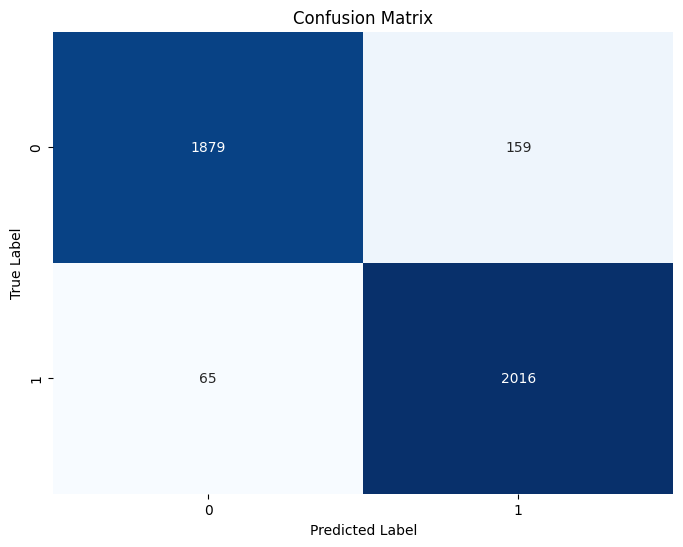

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint, uniform

# Set random seeds for reproducibility
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# Define the model
extra_trees_model = ExtraTreesClassifier(random_state=42)

# Define the parameter grid to search
param_dist = {
    'n_estimators': [100, 200, 500, 1000],  # Number of trees
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider at every split
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'bootstrap': [False, True]  # Whether bootstrap samples are used when building trees
}

# Set up the stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)

# Set up the randomized search with stratified k-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=extra_trees_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring='f1',  # Use F1 score as the evaluation metric
    cv=stratified_kfold,  # Stratified K-Fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters from the randomized search
print("Best parameters found: ", random_search.best_params_)

# Cross-Validation Scores
cv_scores = random_search.cv_results_['mean_test_score']
print("Cross-Validation Accuracy Scores: ", cv_scores)

# Mean Cross-Validation Accuracy
mean_cv_score = np.mean(cv_scores)
print(f"Mean Cross-Validation Accuracy: {mean_cv_score:.2f}")

# Predict on the test set with the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### 8.1.2. Applying RandomizedSearchCV & Cross-Validation to Combination of Ensemble Methods (Random Forest, Gradient Boosting, and XGBoost Classifier)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'xgb__subsample': 0.9, 'xgb__n_estimators': 400, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.1, 'xgb__colsample_bytree': 0.9, 'rf__n_estimators': 300, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 1, 'rf__max_features': 'sqrt', 'rf__max_depth': 40, 'gb__subsample': 0.8, 'gb__n_estimators': 200, 'gb__max_depth': 4, 'gb__learning_rate': 0.01}
Cross-Validation Accuracy Scores:  [0.92892261 0.93037936 0.93420334 0.93268589 0.9322003  0.93056146
 0.93420334 0.93025797 0.93207891 0.93031866 0.93086495 0.93432473
 0.9293475  0.92843703 0.92831563 0.93644917 0.92084977 0.93499241
 0.93213961 0.93007587 0.9262519  0.93426404 0.93359636 0.93687405
 0.93359636 0.93365706 0.93044006 0.93177542 0.92588771 0.93195751
 0.92758725 0.93450683 0.93311077 0.93499241 0.92837633 0.92437026
 0.9324431  0.935478   0.93165402 0.92728376 0.93948407 0.92983308
 0.93286798 0.93189681 0.93201821 0.92691958 0.93505311 0.

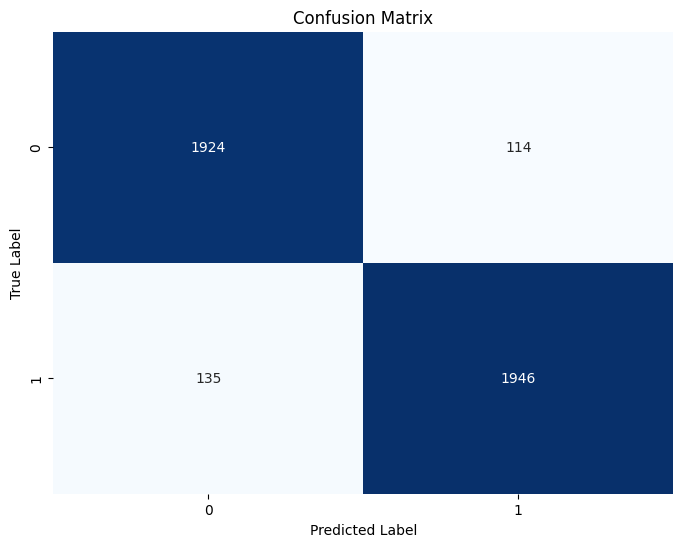

In [44]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
import xgboost as xgb

# Set random seeds for reproducibility
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)

# Define the base models with default parameters
base_models = [
    ('rf', RandomForestClassifier(random_state=random_seed)),
    ('gb', GradientBoostingClassifier(random_state=random_seed)),
    ('xgb', xgb.XGBClassifier(random_state=random_seed))
]

# Define the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=xgb.XGBClassifier(random_state=random_seed))

# Define refined parameter grids for RandomizedSearchCV
param_grid = {
    'rf__n_estimators': [300, 500, 700],
    'rf__max_depth': [20, 30, 40],
    'rf__min_samples_split': [5, 10, 15],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2'],

    'gb__n_estimators': [200, 300, 400],
    'gb__learning_rate': [0.01, 0.05, 0.1],
    'gb__max_depth': [4, 5, 6],
    'gb__subsample': [0.7, 0.8, 0.9],

    'xgb__n_estimators': [200, 300, 400],
    'xgb__max_depth': [5, 7, 9],
    'xgb__learning_rate': [0.05, 0.1, 0.2],
    'xgb__subsample': [0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [0.8, 0.9, 1.0]
}

# Set up the stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)

# RandomizedSearchCV with more iterations and Stratified K-fold Cross-validation
random_search = RandomizedSearchCV(
    estimator=stacking_clf,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings to sample
    scoring='accuracy',  # Using accuracy as the evaluation metric
    cv=stratified_kfold,  # Stratified K-Fold cross-validation
    verbose=2,
    random_state=random_seed,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters from the randomized search
print("Best parameters found: ", random_search.best_params_)

# Cross-Validation Scores
cv_scores = random_search.cv_results_['mean_test_score']
print("Cross-Validation Accuracy Scores: ", cv_scores)

# Mean Cross-Validation Accuracy
mean_cv_score = np.mean(cv_scores)
print(f"Mean Cross-Validation Accuracy: {mean_cv_score:.2f}")

# Predict on the test set with the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()                    

### 8.2 Analysis/Comparison of the Extra Trees Model and the Combination of Ensemble Methods after Hyperparameter Tuning and Cross-Validation

**1. Recall**: The recall value for the Extra Trees model is quite higher at 0.97 compared to 0.94 for the Combination of Ensemble Methods model, meaning that the Extra Trees model better identifies the real purchases. Furthermore, the parameter recall is quite important within the context of forecasting whether an online shopping session will produce a purchase or not, since this factor captures most of the real purchases by the model and, at the same time, reduces missed opportunities.

**2. Precision**: Both the models are roughly equal in precision, but the Combination of Ensemble Methods model, is a bit better: 0.94 vs. 0.93. This means that in cases when the model predicts a purchase, it is a bit more likely to be right, but once again, it is a minor difference and may be negligible in cases like predicting purchasing intentions when recall plays a more significant role.

**3. F1 Score**: The scores are indeed very similar, with an Extra Trees model slightly higher at 0.95 versus 0.94. This actually means that the Extra Trees model has a better balance between precision and recall, which is important in this predictive task where both false positives and false negatives do have consequences.

**4. ROC AUC Score**: Both models have similar ROC AUC scores, 0.94-0.95; this would indicate that they are similarly effective at distinguishing between sessions that lead to purchases and those that do not.

**5. Confusion Matrix**:  The Extra Trees model has fewer false negatives, 65 versus 135; this might be very important in making sure potential purchases are not missed. It also has slightly more false positives, 159 versus 114, but given the task, that could be a good tradeoff to avoid missing actual purchases.

**Conclusion**
The Extra Trees model has higher recall and an F1 score; hence, it is more suitable for this predictive analytics task. This model is very good at capturing most of the actual purchases, which can be very useful in trying to maximize potential revenue by identifying most purchasing sessions. Although slightly lower in precision when compared to the Combination of Ensemble Methods, the improvement in recall and F1 score makes it much more effective, overall, in this context.
The Combination of Ensemble Methods Model is something one could consider when there is a need to maintain a slightly higher precision, minimize false positives, which might be relevant in the case where the cost of a false alarm is high. Given how crucial recall is in this task, the Extra Trees model is generally more favourable.